In [2]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import netCDF4
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from PIL import Image

In [3]:
# df_data = pd.read_csv('your_file.csv')

In [4]:
# Load the TIFF file
# tiff_file = 'path/to/your/file.tiff'
# img = Image.open(tiff_file)
# img_array = np.array(img)<1

# # Plot the 2D image
# # plt.imshow(img_array, cmap='viridis_r')
# plt.scatter()
# plt.colorbar()
# plt.title('2D Plot of TIFF Image')
# plt.xlabel('X axis')
# plt.ylabel('Y axis')

# plt.show()

# Making Maps from a .nc File

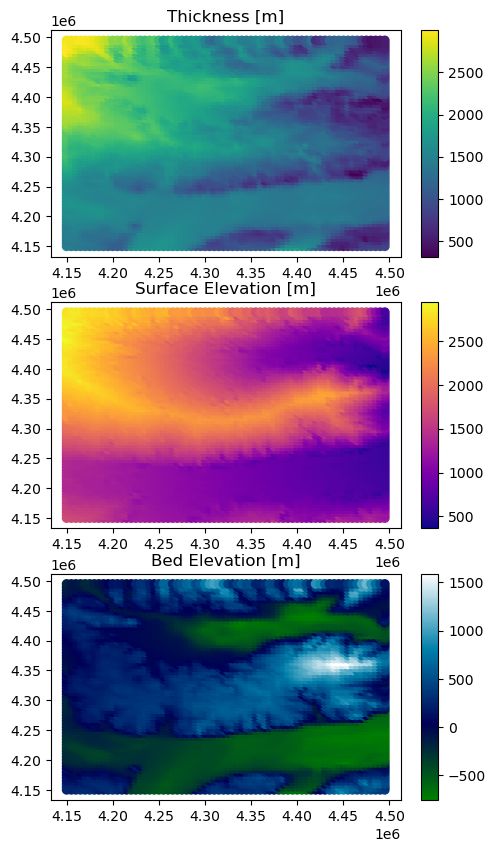

In [5]:
thk_path = r'C:\Users\Jason\Downloads\Gowan_ice_reconstruction\ice_reconstruction\ice_reconstruction_files\North_America_a1\thickness\20000.nc'
srf_path = r'C:\Users\Jason\Downloads\Gowan_ice_reconstruction\ice_reconstruction\ice_reconstruction_files\North_America_a1\topo\20000.nc'

thk = netCDF4.Dataset(thk_path)
srf = netCDF4.Dataset(srf_path)
# modern = netCDF4.Dataset(path)

#subset for devon region
thk_sub = thk['z'][:][830:900,830:900]
srf_sub = srf['z'][:][830:900,830:900]
# modern_sub = modern['z'][:][830:900,830:920]
x = srf['x'][:][830:900] #each data set is on the same grid
y = srf['y'][:][830:900]
bed = srf_sub - thk_sub

X, Y = np.meshgrid(x, y)

# while i < (bed.size - 1):

# bed[bed < 0] = np.NaN
srf_sub[bed==np.NaN] = np.NaN
thk_sub[bed==np.NaN] = np.NaN

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 10))

p1 = ax1.scatter(X,Y,c = thk_sub, cmap = 'viridis')

p2 = ax2.scatter(X,Y, c = srf_sub, cmap = 'plasma')

p3 = ax3.scatter(X,Y, c = bed, cmap = 'ocean')

# Add titles
ax1.set_title('Thickness [m]')
ax2.set_title('Surface Elevation [m]')
ax3.set_title('Bed Elevation [m]')

# Add colorbars
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes("right", size="5%", pad=0.2)
cbar1 = plt.colorbar(p1, cax=cax1)

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="5%", pad=0.2)
cbar2 = plt.colorbar(p2, cax=cax2)

divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes("right", size="5%", pad=0.2)
cbar3 = plt.colorbar(p3, cax=cax3)

# Plotting 3D Bed Elevation

In [10]:
# Create a surface plot
fig = go.Figure(data=[go.Surface(z=bed, x=X, y=Y, colorscale='viridis', cmin=0, cmax=2000)])

# Update layout for better visualization
fig.update_layout(
    title='Bed Elevation [m]',
    scene = dict(
        xaxis_title='Eastings [m]',
        yaxis_title='Y=Northings [m]',
        zaxis_title='Elevation [m]',
    ),
    autosize=True,
    width=800,
    height=800,
    margin=dict(l=45, r=50, b=65, t=100)
)

# Add color bar
fig.update_layout(coloraxis_colorbar=dict(
    title="Bed elevation [m]",
    tickvals=[10, 15, 20, 25, 30],
    ticks="outside"
))

# Adjust the layout for vertical exaggeration by modifying the aspect ratio
fig.update_layout(
    scene=dict(
        aspectratio=dict(x=1, y=1, z=0.1),  # Adjust z ratio to flatten or exaggerate
        zaxis=dict(title='Z Axis'),
        xaxis=dict(title='X Axis'),
        yaxis=dict(title='Y Axis')
    )
)
# Show the plot
fig.show()

X.shape

ERROR! Session/line number was not unique in database. History logging moved to new session 280


(70, 70)

# Plot Surface Elevation Map

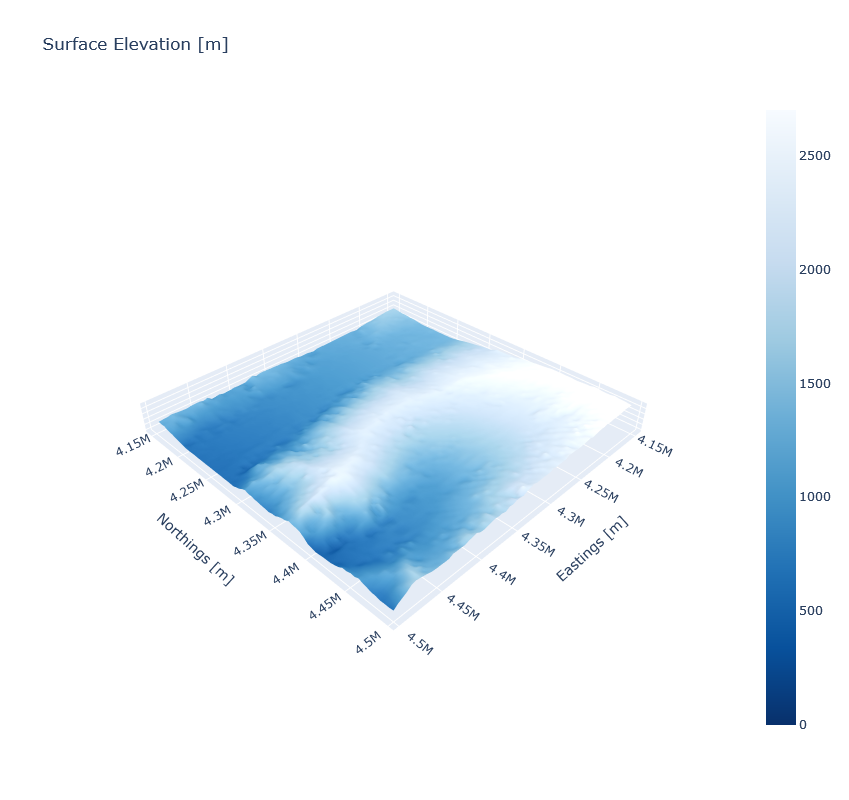

In [15]:
# Create a surface plot
fig = go.Figure(data=[go.Surface(z=srf_sub, x=X, y=Y, colorscale='blues_r', cmin=0, cmax=2700)])

# Update layout for better visualization
fig.update_layout(
    title='Surface Elevation [m]',
    scene = dict(
        xaxis_title='Eastings [m]',
        yaxis_title='Northings [m]',
        zaxis_title=' ',
    ),
    autosize=True,
    width=800,
    height=800,
    margin=dict(l=45, r=50, b=65, t=100)
)

fig.update_layout(
    scene=dict(
        aspectratio=dict(x=1, y=1, z=0.1),  # Adjust z ratio to flatten or exaggerate
        zaxis=dict(
            showticklabels=False  # Remove tick labels
           ),
         ),
        xaxis=dict(title='Eastings [m]'),
        yaxis=dict(title='Northings [m]')
        
    )

# Show the plot
fig.show()

File format: NETCDF3_CLASSIC
Dimensions: dict_keys(['Time', 'Lat', 'Lon'])
Variables: dict_keys(['stgit', 'Time', 'Lat', 'Lon'])


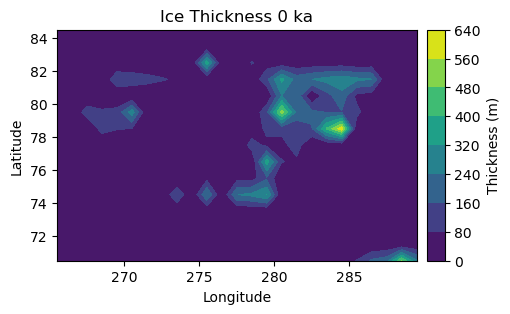

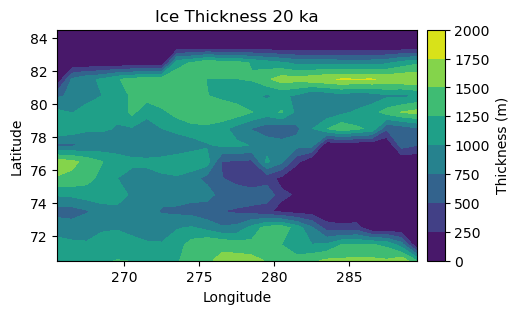

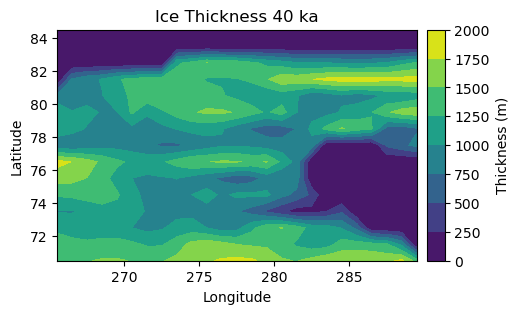

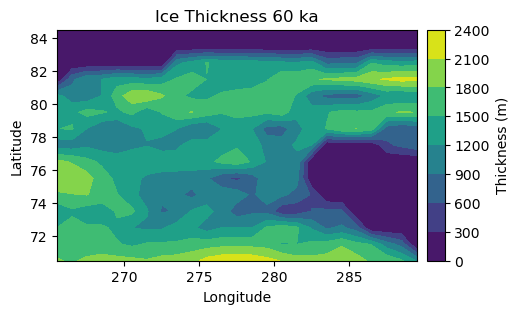

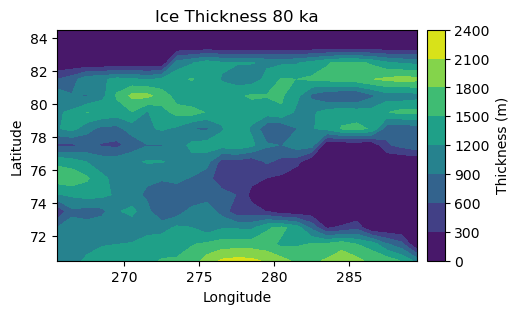

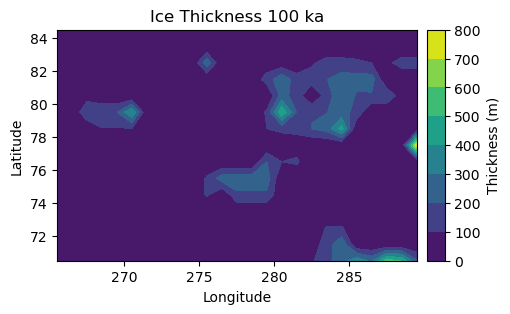

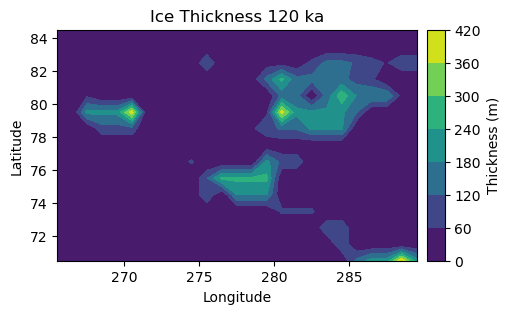

122


In [16]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Path to your .nc file
ice6g26_path = r'C:\Users\Jason\Downloads\ICE-6G_C_IceThickness_1deg.nc\IceT.I6F_C.131QB_VM5a_1deg.nc'

# Open the NetCDF file
ice6G_26 = netCDF4.Dataset(ice6g26_path)

# Print basic information about the file
print(f"File format: {ice6G_26.file_format}")
print(f"Dimensions: {ice6G_26.dimensions.keys()}")
print(f"Variables: {ice6G_26.variables.keys()}")

i=0
while i<=121:

    # Extract latitude, longitude, and the variable of interest
    lats = ice6G_26.variables['Lat'][:]
    lons = ice6G_26.variables['Lon'][:]
    topo = ice6G_26.variables['stgit'][i,:, :]  # Topographic data

    # Define the region of interest
    lat_min, lat_max = 70, 85  # Example latitude range
    lon_min, lon_max = 265, 290   # Example longitude range

    # Find the indices of the region of interest
    lat_inds = np.where((lats >= lat_min) & (lats <= lat_max))[0]
    lon_inds = np.where((lons >= lon_min) & (lons <= lon_max))[0]

    # Subset the data for the region of interest
    subset_topo = topo[np.ix_(lat_inds, lon_inds)]
    subset_lats = lats[lat_inds]
    subset_lons = lons[lon_inds]

    # Create a meshgrid for plotting
    lon_grid, lat_grid = np.meshgrid(subset_lons, subset_lats)

    # Plot the subset data
    fig, ax = plt.subplots(figsize=(5, 3))

    # Create the plot
    c = ax.contourf(lon_grid, lat_grid, subset_topo, cmap='viridis')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Ice Thickness '+ str(i)+' ka')

    # Add a colorbar
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(c, cax=cax, label='Thickness (m)')
    
    i+=20

    plt.show()

print(ice6G_26.variables['Time'].size)

# # Close the dataset
# ice6G_26.close()

File format: NETCDF3_CLASSIC
Dimensions: dict_keys(['Time', 'Lat', 'Lon'])
Variables: dict_keys(['stgit', 'Time', 'Lat', 'Lon'])


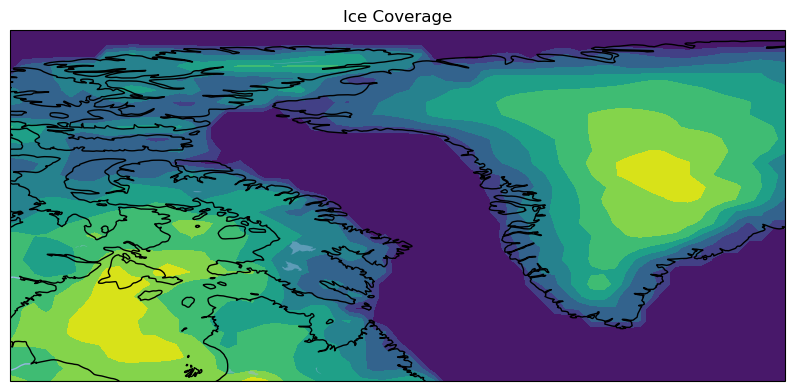

In [16]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Path to your .nc file
ice6g26_path = r'C:\Users\Jason\Downloads\ICE-6G_C_IceThickness_1deg.nc\IceT.I6F_C.131QB_VM5a_1deg.nc'

# Open the NetCDF file
ice6G_26 = netCDF4.Dataset(ice6g26_path)

# Print basic information about the file
print(f"File format: {ice6G_26.file_format}")
print(f"Dimensions: {ice6G_26.dimensions.keys()}")
print(f"Variables: {ice6G_26.variables.keys()}")

# Extract latitude, longitude, and the variable of interest
lats = ice6G_26.variables['Lat'][:]
lons = ice6G_26.variables['Lon'][:]
topo = ice6G_26.variables['stgit'][26,:, :]  # Topographic data

# Define the region of interest
lat_min, lat_max = 55, 85  # Example latitude range
lon_min, lon_max = 265, 330  # Example longitude range

# Find the indices of the region of interest
lat_inds = np.where((lats >= lat_min) & (lats <= lat_max))[0]
lon_inds = np.where((lons >= lon_min) & (lons <= lon_max))[0]

# Subset the data for the region of interest
subset_topo = topo[np.ix_(lat_inds, lon_inds)]
subset_lats = lats[lat_inds]
subset_lons = lons[lon_inds]

# Create a meshgrid for plotting
lon_grid, lat_grid = np.meshgrid(lons, lats)

# Plot the subset data with coastlines
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

# Create the plot
c = ax.contourf(subset_lons, subset_lats, subset_topo, cmap='viridis', transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

# ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Ice Coverage')

# # # Add a colorbar
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.1, crs=ccrs.PlateCarree() )
# plt.colorbar(c, cax=cax, label='Topography (m)')

plt.show()

# Close the dataset
ice6G_26.close()

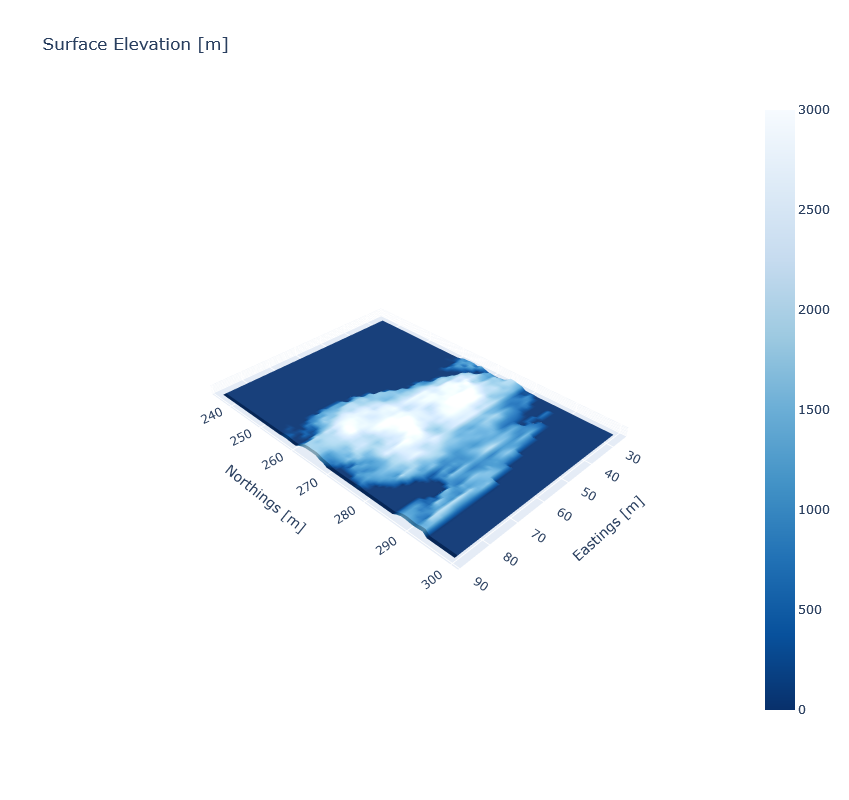

In [9]:
# Define the region of interest
lat_min, lat_max = 25, 115  # Example latitude range
lon_min, lon_max = 235, 360  # Example longitude range

# Find the indices of the region of interest
lat_inds = np.where((lats >= lat_min) & (lats <= lat_max))[0]
lon_inds = np.where((lons >= lon_min) & (lons <= lon_max))[0]

# Subset the data for the region of interest
subset_topo = topo[np.ix_(lat_inds, lon_inds)]
subset_lats = lats[lat_inds]
subset_lons = lons[lon_inds]


# Create a surface plot
fig = go.Figure(data=[go.Surface(z=subset_topo, x=subset_lats, y=subset_lons, colorscale='blues_r', cmin=0, cmax=3000)])

# Update layout for better visualization
fig.update_layout(
    title='Surface Elevation [m]',
    scene = dict(
        xaxis_title='Eastings [m]',
        yaxis_title='Northings [m]',
        zaxis_title=' ',
    ),
    autosize=True,
    width=800,
    height=800,
)

fig.update_layout(
    scene=dict(
        aspectratio=dict(x=0.7, y=1, z=0.03),  # Adjust z ratio to flatten or exaggerate
        zaxis=dict(
            showticklabels=False  # Remove tick labels
           ),
         ),
        xaxis=dict(title='Eastings [m]'),
        yaxis=dict(title='Northings [m]')
        
    )

# Show the plot
fig.show()